# Human Cell Lines Preprocessing

In [1]:
# import mazebox as mb
import scvelo as scv
import scanpy as sc
import os.path as op
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys
import dropkick as dk
# make sure to use position 1
sys.path.insert(1, "/Users/smgroves/Documents/GitHub/Groves-CellSys2021/")
import mazebox as mb
import cellrank as cr
import scanorama

## Read in Files

In [2]:
indir = "../../../data/single-cell-rna-seq/Human-cell-lines/"

samples =["2637-1-DMS454","2637-2-CORL279","2637-3-H1048","2638-1-H82","2638-2-H69","2638-4-H841","2639-1-H524","2639-2-DMS53"]
[a1,a2,a3,a4,a5,a6,a7, a8] = [mb.pp.read_loom(sample, indir) for sample in samples]


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/anndata/utils.py:117: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD113-1', 'SNORD113-2']
  + str(example_colliding_values)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/anndata/utils.py:117: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Ex

In [4]:
tfs = ['SP100', 'FOSL1', 'HES1', 'NFKBIZ', 'RELB', 'EPAS1', 'BCL3', 'REST', 'SP110', 'NFKB2', 'TEAD2', 'HMG20B', 'SIX5',
       'RARG', 'TEAD4', 'ZNF217', 'SP140L', 'SOX18', 'HOXC13', 'STAT6', 'ETV4', 'KLF2', 'MITF', 'NR0B2', 'ASCL1', 'ZBTB7C', 'ELF3',
       'RORC', 'FOXA2', 'ETS2','TOX3', 'XBP1', 'ST18', 'FOXA1', 'OVOL2', 'ZNF664', 'TBX10', 'PROX1', 'ETV6', 'CEBPD', 'TFCP2L1', 'FOXJ3',
       'ZNF407', 'ZNF511','ZNF396', 'RBPJ', 'ZSCAN31', 'HOXB5', 'ZNF3', 'TSHZ2', 'ZBTB16', 'ZNF10', 'FLI1', 'GATA4', 'NR0B1', 'NHLH1',
       'NEUROD6', 'ZNF581', 'TCF15', 'LYAR', 'ISL2', 'OLIG2', 'NEUROD1', 'INSM1', 'PAX5', 'SP6', 'MYT1', 'HES6', 'ZNF24', 'ISL1', 'ZNF397',
       'SOX11', 'ZNF253', 'SMAD4', 'RBP1', 'ONECUT2', 'ZNF711', 'DLX5', 'GRIP1', 'ZNF157', 'ZNF713', 'ZNF136', 'FOXN4', 'PATZ1', 'ZNF491',
       'ZBTB21', 'KLF12', 'ZNF501', 'ZNF785', 'CXXC1', 'ZNF324', 'ZNF764', 'ZBTB18', 'KAT8', 'ZNF334', 'POU4F1', 'ZNF250', 'ZNF132',
       'SALL2', 'DLX6', 'MBD1','SOX1', 'ZFP3', 'ZNF543', 'POU2F1', 'NONO', 'SMAD9', 'ZKSCAN2', 'TCF12', 'VEZF1', 'TOX', 'BHLHE22', 'MTA1',
       'TCF3', 'SCRT2', 'RFX7','NHLH2', 'SCRT1', 'RCOR2', 'PURG', 'TBPL1', 'TCF4', 'EBF1', 'ZNF749', 'NEUROD2', 'ZNF423', 'BACH2', 'GLI1',
       'ZFP64','NKX2-1', 'MYC', 'YAP1', 'POU2F3', 'MYCL', 'MYCN', 'ASCL2', 'AVIL', 'CHAT', 'GFI1B',
      'CHGA','EPCAM']


## Dropkick

How many cells in each dataset?

In [11]:
total_cells = 0
for i,a in enumerate([a1,a2,a3,a4,a5,a6,a7, a8]):
    print(samples[i])
    print(a.X.shape)
    total_cells += a.X.shape[0]
print("Total cells: ", total_cells)

2637-1-DMS454
(8510, 63677)
2637-2-CORL279
(15103, 63677)
2637-3-H1048
(13422, 63677)
2638-1-H82
(8691, 63677)
2638-2-H69
(5919, 63677)
2638-4-H841
(8924, 63677)
2639-1-H524
(11977, 63677)
2639-2-DMS53
(13946, 63677)
Total cells:  86492


In [12]:
ax = a1.copy()
sc.pp.filter_cells(ax, min_genes=100)

In [13]:
ax

AnnData object with n_obs × n_vars = 8486 × 63677
    obs: 'n_genes'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [5]:
batch_categories = ["DMS454","CORL279","H1048","H82","H69","H841","H524","DMS53"]
batch_key = 'cline'

adatas = [a1,a2,a3,a4,a5,a6,a7,a8] 


adata = mb.pp.dropkick_recipe(adatas, verbose=False, filter=False, batch_categories = batch_categories, batch_key = batch_key,
                                                X_final = 'log1p_norm',plot = False, n_hvgs=None,
                                                retain_genes=tfs)


Running dropkick on each sample and filtering...
Chosen lambda value:
	[0.05393782]
Assigning scores and labels
Done!

Chosen lambda value:
	[0.02565323]
Assigning scores and labels
Done!

Chosen lambda value:
	[0.03505034]
Assigning scores and labels
Done!

Chosen lambda value:
	[0.036478]
Assigning scores and labels
Done!

Chosen lambda value:
	[0.10863844]
Assigning scores and labels
Done!

Chosen lambda value:
	[0.04689123]
Assigning scores and labels
Done!

Chosen lambda value:
	[0.02251933]
Assigning scores and labels
Done!

Chosen lambda value:
	[0.02150734]
Assigning scores and labels
Done!

AnnData object with n_obs × n_vars = 86492 × 63677
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'cline'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'dropkick_coef-CORL279', 'dropkick_coef-DMS454', 'dropkick_coef-DMS53', 'dropkick_coef-H1048', 'dropkick_coef-H524', 'dropkick_coef-H69', 'dropkick_coef-H82', 'dropkick_coef-H841'
    layers: 'matri

In [6]:
adata

AnnData object with n_obs × n_vars = 86349 × 22475
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'cline', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'arcsinh_total_counts', 'S_score', 'G2M_score', 'phase'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'dropkick_coef-CORL279', 'dropkick_coef-DMS454', 'dropkick_coef-DMS53', 'dropkick_coef-H1048', 'dropkick_coef-H524', 'dropkick_coef-H69', 'dropkick_coef-H82', 'dropkick_coef-H841', 'mito', 'pct_dropout_by_counts', 'ambient', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'total_counts', 'log1p_total_counts', 'mean', 'std'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced', 'raw_counts

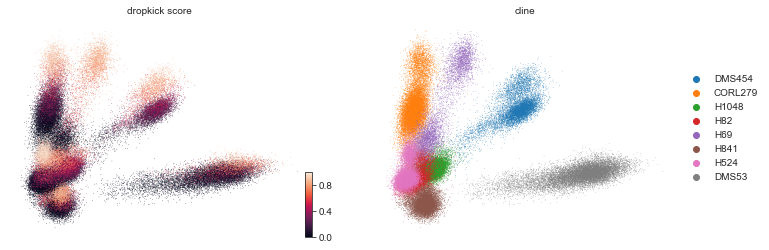

In [7]:
scv.pl.pca(adata, color = ['dropkick_score','cline'], legend_loc = 'on right')

In [8]:
scv.pp.neighbors(adata, random_state=0)
scv.tl.umap(adata, random_state=0)

computing neighbors
    finished (0:00:19) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)


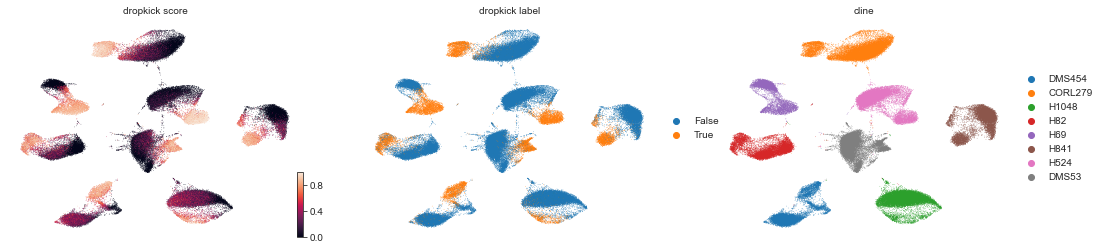

In [9]:
scv.pl.umap(adata, color = ['dropkick_score','dropkick_label','cline'], legend_loc = 'on right')

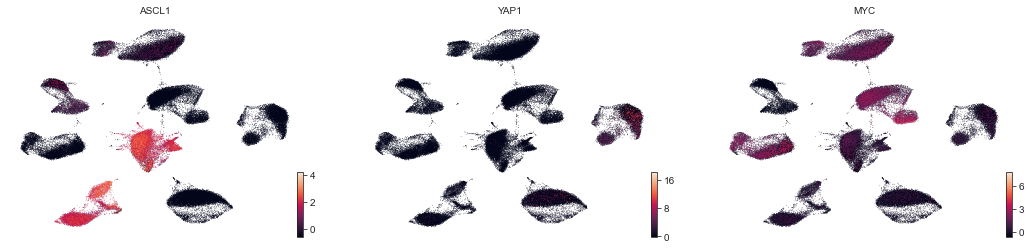

In [10]:
scv.pl.umap(adata, color = ['ASCL1','YAP1','MYC'], legend_loc = 'on right')

In my dropkick recipe, setting filter = False will add the dropkick labels/scores to adata but does not actually filter any cells or genes. It **will** filter cells and genes based on scanpy's and scvelo's functions:
`sc.pp.filter_cells(adata, min_genes=min_genes);
scv.pp.filter_genes(adata, min_counts=min_counts, retain_genes=retain_genes)`


In [11]:
adata_dk = adata[adata.obs.dropkick_label=='True'].copy() #if this throws an error or gives 0 cells, try ==1 or == True

In [12]:
scv.pp.pca(adata_dk, random_state=0)

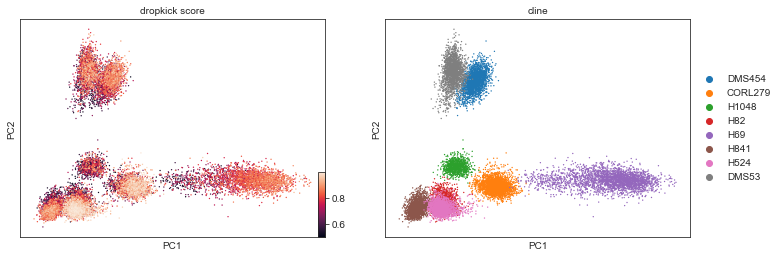

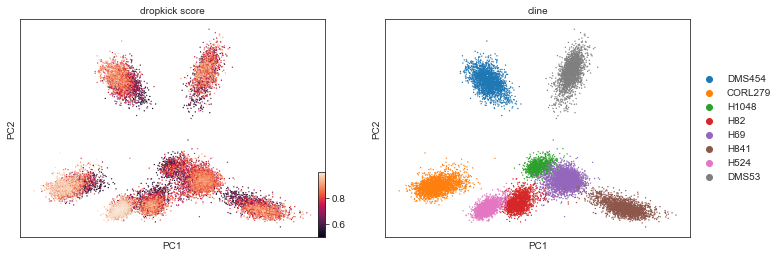

In [13]:
scv.pl.pca(adata_dk, color = ['dropkick_score','cline'], legend_loc = 'on right', components="1,2", frameon=True)
scv.pl.pca(adata_dk, color = ['dropkick_score','cline'], legend_loc = 'on right', components="3,2", frameon = True)

In [14]:
scv.pp.neighbors(adata_dk, random_state=0)
scv.tl.umap(adata_dk, random_state=0)

computing neighbors
    finished (0:00:01) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)


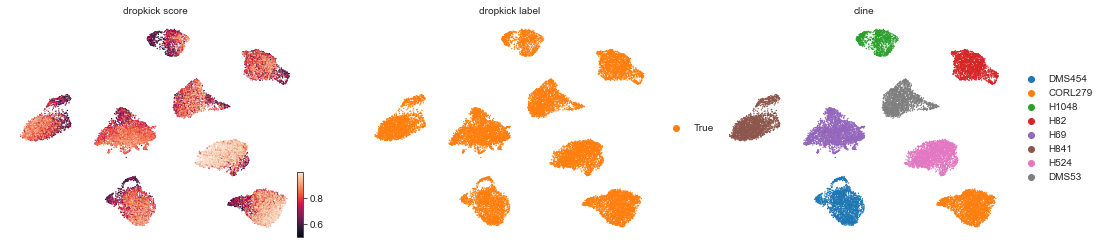

In [15]:
scv.pl.umap(adata_dk, color = ['dropkick_score','dropkick_label','cline'], legend_loc = 'on right')

In [16]:
# adata_dk.write_h5ad('../../out/cell-lines/adata_dk_01.h5ad')

In [14]:
# adata = sc.read_h5ad('/Users/smgroves/Dropbox (VU Basic Sciences)/Groves-CellSys2021-data-archive/cell-lines/adata_dk_01.h5ad')

In [15]:
adata

AnnData object with n_obs × n_vars = 16108 × 22475
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'cline', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'arcsinh_total_counts', 'S_score', 'G2M_score', 'phase'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'dropkick_coef-CORL279', 'dropkick_coef-DMS454', 'dropkick_coef-DMS53', 'dropkick_coef-H1048', 'dropkick_coef-H524', 'dropkick_coef-H69', 'dropkick_coef-H82', 'dropkick_coef-H841', 'mito', 'pct_dropout_by_counts', 'ambient', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'total_counts', 'log1p_total_counts', 'mean', 'std'
    uns: 'cline_colors', 'dropkick_label_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs

## Integration using scanorama

In [17]:
#moved to data archive
# adata = sc.read_h5ad('../../out/cell-lines/adata_dk_01.h5ad')
adata = adata_dk

We'll use scanorama's umap to visualize the data. Scanorama has been updated since I first wrote this code, so I updated it appropriately. Now, we split adata into batches and give the list of adatas to scanorama.correct_scanpy. `corrected` is a new list of adatas where X is the corrected data and `corrected[0].obsm['X_scanorama']` has the integrated data for dimensionality reduction. I can then use the integrated data to find nearest neighbors and run umap, or run a PCA on the corrected data X. 
```
sc.pp.neighbors(adata_spatial, use_rep="X_scanorama")
sc.tl.umap(adata_spatial)
sc.tl.leiden(adata_spatial, key_added="clusters")
```

In [18]:
# mb.pp.scanorama_recipe(adata_dk, groups = 'cline', correct = True, basis = 'umap')
#updated scanorama 1.7 broke this function because it only returns one value instead of a two-tuple for correct_scanpy

In [19]:
batches = sorted(adata.obs['cline'].cat.categories)

alldata = {}
for batch in batches:
    print(batch)
    alldata[batch] = adata[adata.obs['cline'] == batch,]

# convert to list of AnnData objects
adatas = list(alldata.values())
corrected = scanorama.correct_scanpy(adatas, return_dimred=True)
for i in corrected:
    print(i.obs['cline'][0])

CORL279
DMS454
DMS53
H1048
H524
H69
H82
H841
Found 22475 genes among all datasets
[[0.         0.10313901 0.         0.04636459 0.00085288 0.01643444
  0.01110462 0.00048473]
 [0.         0.         0.10114599 0.03477345 0.         0.00149477
  0.00058445 0.        ]
 [0.         0.         0.         0.09799789 0.         0.
  0.         0.01696558]
 [0.         0.         0.         0.         0.00105374 0.00842993
  0.06638567 0.15068493]
 [0.         0.         0.         0.         0.         0.
  0.2226768  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.04441847 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.11972855]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]
Processing datasets (4, 6)
Processing datasets (3, 7)
Processing datasets (6, 7)
Processing datasets (0, 1)
Processing datasets (1, 2)
CORL279
DMS454
DMS53
H1048
H524
H69
H82
H841


Now `corrected.X` can be added to adata as a new layer `corrected`, and `corrected.obsm['X_scanorama']` can be added to `adata.obsm`.

In [20]:
#if you rerun this, it **will** pop off another adata and you will have removed a cell line!!
#if you do, use this before rerunning: 
#corrected = [first, corrected[0],corrected[1],corrected[2],corrected[3],corrected[4],corrected[5],corrected[6]]

first = corrected.pop(0)
adata_SC = first.concatenate(corrected, batch_key='cline',
                                            batch_categories=batches)

In [21]:
adata_SC.obs_names = [i.rsplit('-',1)[0] for i in adata_SC.obs_names]

In [22]:
adata.obsm['corrected'] = adata_SC[adata.obs_names,:].X
adata.obsm['X_scanorama'] = adata_SC[adata.obs_names,:].obsm['X_scanorama']

In [53]:
#save gene list for obsm['corrected'] 
adata.uns['corrected_genes'] = list(adata_SC.var_names)

In [23]:
#del adata_SC

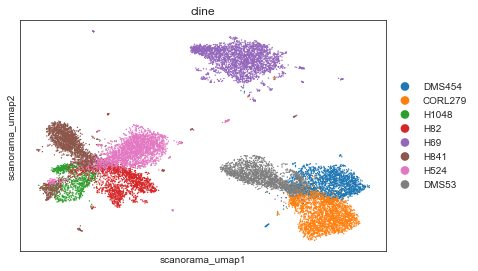

In [24]:
sc.pp.neighbors(adata, use_rep="X_scanorama", key_added='scanorama_neighbors')
tmp = sc.tl.umap(adata, neighbors_key='scanorama_neighbors', random_state=0, copy=True)
adata.obsm['X_scanorama_umap'] = tmp.obsm['X_umap']
del tmp
sc.pl.scatter(adata, basis='scanorama_umap',color='cline')

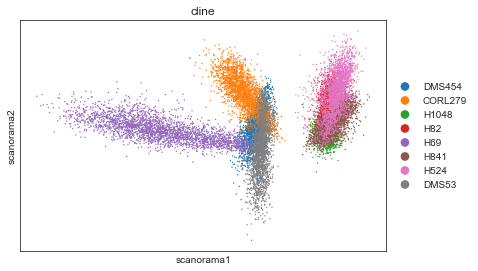

In [25]:
sc.pl.scatter(adata, basis='scanorama', color='cline')

## Doublet detection

Given a raw (unnormalized) UMI counts matrix counts_matrix with cells as rows and genes as columns, calculate a doublet score for each cell:

```import scrublet as scr
scrub = scr.Scrublet(counts_matrix)
doublet_scores, predicted_doublets = scrub.scrub_doublets()
scr.scrub_doublets() simulates doublets from the observed data and uses a k-nearest-neighbor classifier to calculate a continuous doublet_score (between 0 and 1) for each transcriptome. The score is automatically thresholded to generate predicted_doublets, a boolean array that is True for predicted doublets and False otherwise.
```
Best practices:
- When working with data from multiple samples, run Scrublet on each sample separately. Because Scrublet is designed to detect technical doublets formed by the random co-encapsulation of two cells, it may perform poorly on merged datasets where the cell type proportions are not representative of any single sample.
- Check that the doublet score threshold is reasonable (in an ideal case, separating the two peaks of a bimodal simulated doublet score histogram, as in this example), and adjust manually if necessary.
- Visualize the doublet predictions in a 2-D embedding (e.g., UMAP or t-SNE). Predicted doublets should mostly co-localize (possibly in multiple clusters). If they do not, you may need to adjust the doublet score threshold, or change the pre-processing parameters to better resolve the cell states present in your data.


In [8]:
for a in [a1,a2,a3,a4,a5,a6,a7, a8]:
    mb.pp.doublet_detections(a, layer = 'matrix')

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.77
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.3%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 12.0%
Elapsed time: 9.1 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.25
Detected doublet rate = 20.8%
Estimated detectable doublet fraction = 49.4%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 42.2%
Elapsed time: 20.0 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.56
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.1%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 9.5%
Elapsed time: 14.8 seconds
Preprocessing...
Simulating dou

In [46]:
(a2.obs.predicted_doublets == True).sum()

3148

CORL279 is the only one with a high proportion of predicted doublets-- 20%. Let's look into this a little more.

In [50]:
import scrublet as scr
counts = a2.layers['matrix']
scrub = scr.Scrublet(counts)
doublet_scores, predicted_doublets = scrub.scrub_doublets()


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.25
Detected doublet rate = 20.8%
Estimated detectable doublet fraction = 49.4%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 42.2%
Elapsed time: 19.9 seconds


(<Figure size 576x216 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

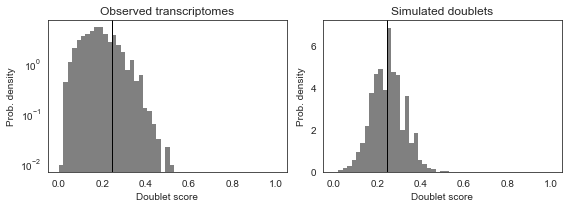

In [51]:
scrub.plot_histogram()

In [52]:
print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))

# # Uncomment to run tSNE - slow
# print('Running tSNE...')
# scrub.set_embedding('tSNE', scr.get_tsne(scrub.manifold_obs_, angle=0.9))

# # Uncomment to run force layout - slow
# print('Running ForceAtlas2...')
# scrub.set_embedding('FA', scr.get_force_layout(scrub.manifold_obs_, n_neighbors=5. n_iter=1000))
    
print('Done.')

Running UMAP...
Done.


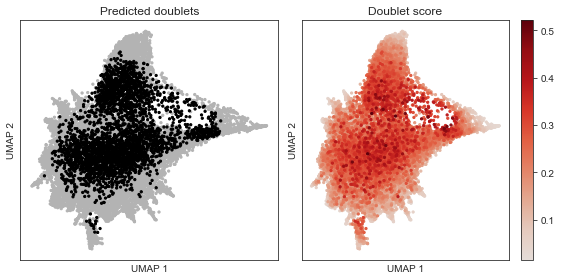

In [53]:
scrub.plot_embedding('UMAP', order_points=True);


In [54]:
scrub_z = scr.Scrublet(counts)
doublet_scores_z, predicted_doublets_z = scrub_z.scrub_doublets(n_prin_comps=30, 
                                                                mean_center=True, 
                                                                normalize_variance=True,                
                                                                log_transform=True
                                                               )

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.11
Detected doublet rate = 28.6%
Estimated detectable doublet fraction = 89.6%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 31.9%
Elapsed time: 23.0 seconds


(<Figure size 576x216 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

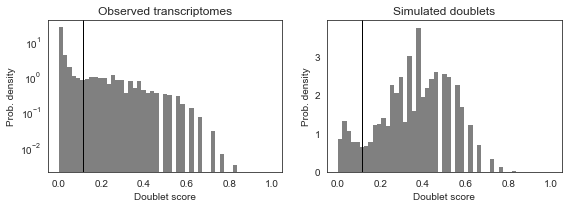

In [55]:
scrub_z.plot_histogram()

In [56]:
print('Running UMAP...')
scrub_z.set_embedding('UMAP', scr.get_umap(scrub_z.manifold_obs_, 10, min_dist=0.3))

# # Uncomment to run tSNE - slow
# print('Running tSNE...')
# scrub.set_embedding('tSNE', scr.get_tsne(scrub.manifold_obs_, angle=0.9))

# # Uncomment to run force layout - slow
# print('Running ForceAtlas2...')
# scrub.set_embedding('FA', scr.get_force_layout(scrub.manifold_obs_, n_neighbors=5. n_iter=1000))
    
print('Done.')

Running UMAP...
Done.


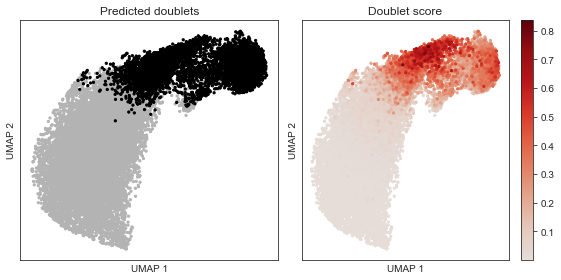

In [57]:
scrub_z.plot_embedding('UMAP', order_points=True);


Without log-transformation, the doublet percentage is about 20%, and with log-transformation it's about 28%. Since the doublets colocalize in the UMAP plot better for the log-transformed version, we'll use those scores.

In [75]:
a2.obs["doublet_scores"] = doublet_scores_z
a2.obs["predicted_doublets"] = predicted_doublets_z
# the other adatas already have these attributes from the mazebox recipe

In [76]:
batch_categories = ["DMS454","CORL279","H1048","H82","H69","H841","H524","DMS53"]
batch_key = 'cline'
adata_scrubbed = a1.concatenate([a2,a3,a4,a5,a6,a7,a8], batch_key=batch_key, batch_categories=batch_categories)

In [90]:
# transfer doublet scores to adata by first resorting adata_scrubbed by index
#add attribute as independently calculated doublets
adata.obs['doublet_scores_ind'] = adata_scrubbed.obs.loc[adata.obs.index].doublet_scores
adata.obs['predicted_doublets_ind'] = adata_scrubbed.obs.loc[adata.obs.index].predicted_doublets

In [92]:
adata.obs.doublet_scores_ind = [str(i) for i in adata.obs.doublet_scores_ind]
adata.obs.predicted_doublets_ind = [str(i) for i in adata.obs.predicted_doublets_ind]

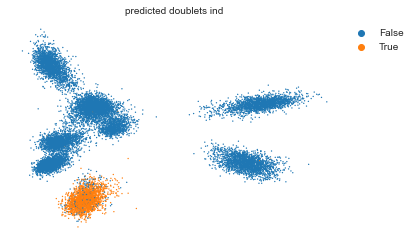

In [96]:
scv.pl.pca(adata, color = 'predicted_doublets_ind', components='2,3')

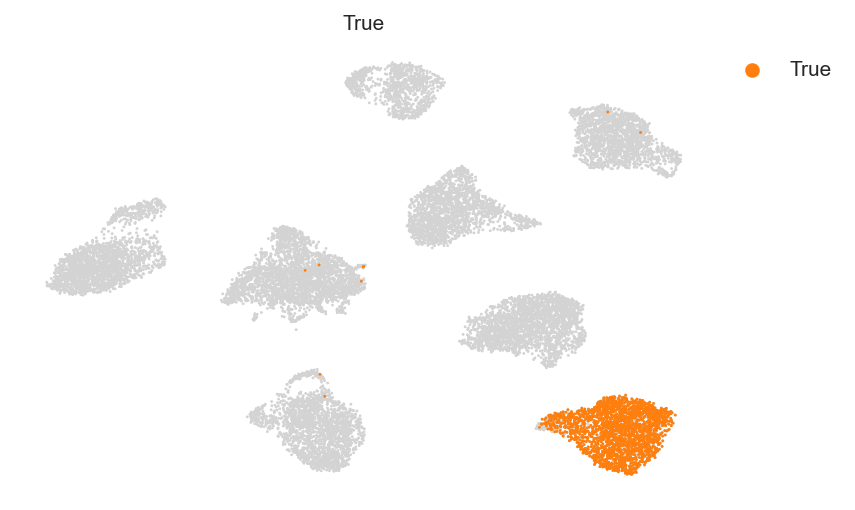

In [115]:
scv.pl.umap(adata, color = 'predicted_doublets_ind', dpi = 150, groups=['True'])

## EMT Signature

In [97]:
emt = pd.read_csv('../../../data/single-cell-rna-seq/Lung EMT signature.csv', header = 0, index_col = 0)


In [98]:
sc.tl.score_genes(adata, gene_list=emt.loc[emt['Group']=='M'].index, score_name='M')
sc.tl.score_genes(adata, gene_list=emt.loc[emt['Group']=='E'].index, score_name='E')

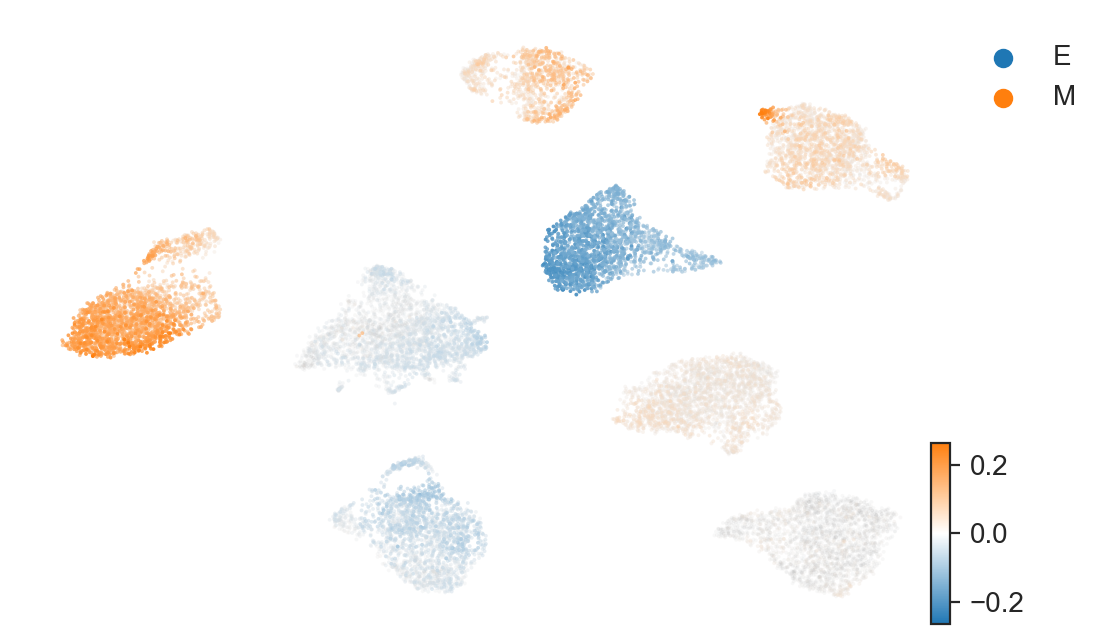

In [116]:
scv.pl.umap(adata, color_gradients=['E','M'], smooth = True, perc = [5,95], dpi = 200, colorbar = True)


## Cell cycle regression 

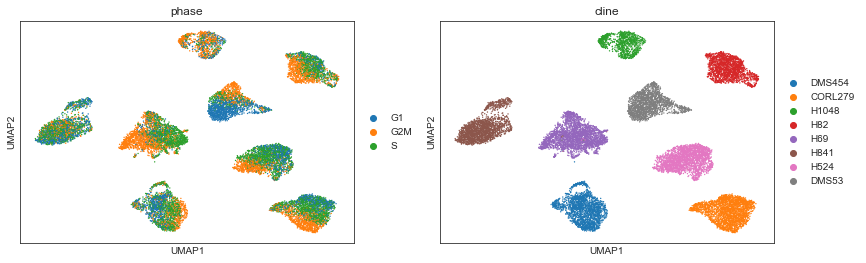

In [359]:
# dropkick recipe already scores cell cycle genes
sc.pl.umap(adata, color=['phase','cline'])

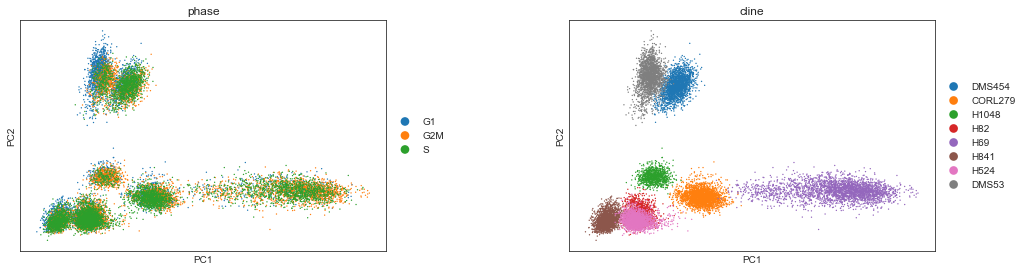

In [107]:
sc.pl.scatter(adata, color=['phase','cline'], basis = 'pca')

In [108]:
adata.obs["cell_cycle_diff"] = adata.obs["S_score"] - adata.obs["G2M_score"]


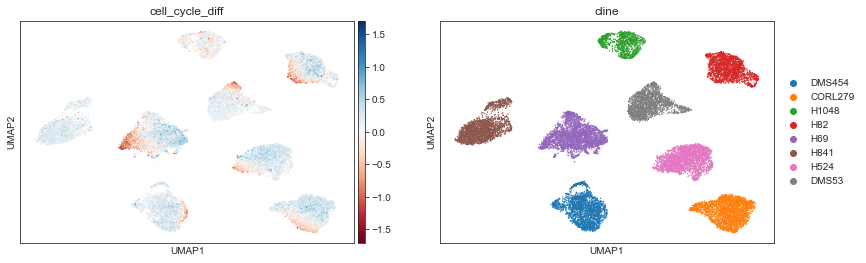

In [109]:
from matplotlib.colors import CenteredNorm 
sc.pl.umap(adata, color=['cell_cycle_diff', 'cline'], cmap = 'RdBu', norm=CenteredNorm(0))

In [21]:
# sc.pp.regress_out(adata, ['S_score', 'G2M_score'])
# sc.pp.scale(adata)

In [24]:
# sc.pp.neighbors(adata, random_state=0)
# sc.tl.leiden(adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


## Saving

Because we filtered out the dropkick cells after filtering cells and genes with scanpy, we need to doublecheck that all of the genes are actually expressed in the dataset, so we'll do a small filter to get rid of any genes we missed.

In [26]:
sc.pp.filter_genes(adata, min_cells=3)

In [110]:
adata

AnnData object with n_obs × n_vars = 16108 × 20446
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'cline', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'arcsinh_total_counts', 'S_score', 'G2M_score', 'phase', 'doublet_scores', 'predicted_doublets', 'doublet_scores_ind', 'predicted_doublets_ind', 'M', 'E', 'clusters_gradients', 'cell_cycle_diff'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'dropkick_coef-CORL279', 'dropkick_coef-DMS454', 'dropkick_coef-DMS53', 'dropkick_coef-H1048', 'dropkick_coef-H524', 'dropkick_coef-H69', 'dropkick_coef-H82', 'dropkick_coef-H841', 'mito', 'pct_dropout_by_counts', 'ambient', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'total_counts', 'log1p_total_cou

In [111]:
adata.write_h5ad('../../out/cell-lines/adata_01.h5ad')

### Save adata_SC too, for MAGIC on scanorama-corrected data
Add to Groves-CellSys2021-data-archive

In [31]:
adata_SC.var = adata_SC.var.drop([i for i in adata_SC.var if 'dropkick' in i], axis = 1)

In [56]:
# adata_SC.write_h5ad('../../out/cell-lines/adata_SC_01.h5ad')